## Logistic Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib
import sklearn as sk

In [6]:
data = pd.read_csv('admissionData.txt', header=None, names=['Exam 1','Exam 2','Admit'])

In [7]:
data.head()

,Exam 1,Exam 2,Admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
examData = data.iloc[:,0:2]
admit = data.iloc[:,2]

In [9]:
examData.head()

,Exam 1,Exam 2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [10]:
admit.head()

0    0
1    0
2    0
3    1
4    1
Name: Admit, dtype: int64

#### Now lets do some exploratory analysis and look at the distribution of the data

[Text(0.5, 0, 'Exam 1'), Text(0, 0.5, 'Exam 2')]

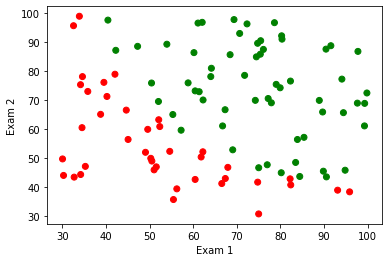

In [22]:
fig, ax = plt.subplots()
ax.scatter(examData[['Exam 1']],examData[['Exam 2']],c=admit, cmap=matplotlib.colors.ListedColormap(['red','green']))
ax.set(xlabel = 'Exam 1', ylabel='Exam 2')

#### We can see this is a logistic regression problem, this is because we can almost draw a "Decision Boundary" whether a student will be admitted or not

#### Lets build a logistic regression model 

In [23]:
logreg = sk.linear_model.LogisticRegression(random_state=25)

In [25]:
logreg.fit(examData, admit)

LogisticRegression(random_state=25)

In [26]:
logreg.predict(examData)

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [27]:
np.sum(logreg.predict(examData)==admit)/len(examData)

0.89

#### This model gives a 89% accuracy, which is better than a random guess, now lets look at specifc exam scores with their correspoding probability

In [29]:
exam1 = np.array([67, 60, 65])
exam2 = np.array([55, 63, 60])

In [34]:
np.stack([exam1, exam2], axis=1)

array([[67, 55],
       [60, 63],
       [65, 60]])

In [35]:
logreg.predict(np.stack([exam1, exam2], axis=1))

array([0, 0, 1])

#### So the first two correspodning exam grades are predicted to not be admitted, while the third is predicted to be permited

In [36]:
logreg.predict_proba(np.stack([exam1, exam2], axis=1))

array([[0.56495702, 0.43504298],
       [0.52351234, 0.47648766],
       [0.41802059, 0.58197941]])

#### Furthermore, the first student will have a 56% chance of being rejected, and a 43% chance of being accepted

#### Looking at more data points we can see that this probability is dependent on the exam scores. Looking at more data points we can see that the probabilities can drastically change

In [37]:
e1 = np.array([90, 95, 98, 90, 95, 48, 90, 30])
e2 = np.array([95, 90, 90, 98, 48, 95, 30, 90])

In [38]:
logreg.predict(np.stack([e1, e2], axis=1))

array([1, 1, 1, 1, 1, 1, 0, 0])

In [39]:
logreg.predict_proba(np.stack([e1, e2], axis=1))

array([[3.78216443e-06, 9.99996218e-01],
       [3.69300686e-06, 9.99996307e-01],
       [1.99446921e-06, 9.99998006e-01],
       [2.07206718e-06, 9.99997928e-01],
       [1.65521908e-02, 9.83447809e-01],
       [2.06271547e-02, 9.79372845e-01],
       [6.34770346e-01, 3.65229654e-01],
       [6.98255284e-01, 3.01744716e-01]])

#### The first and second student have almost a 99% chance of being accepcted, which makes sense since their exam scores were both high